# Dataset generation

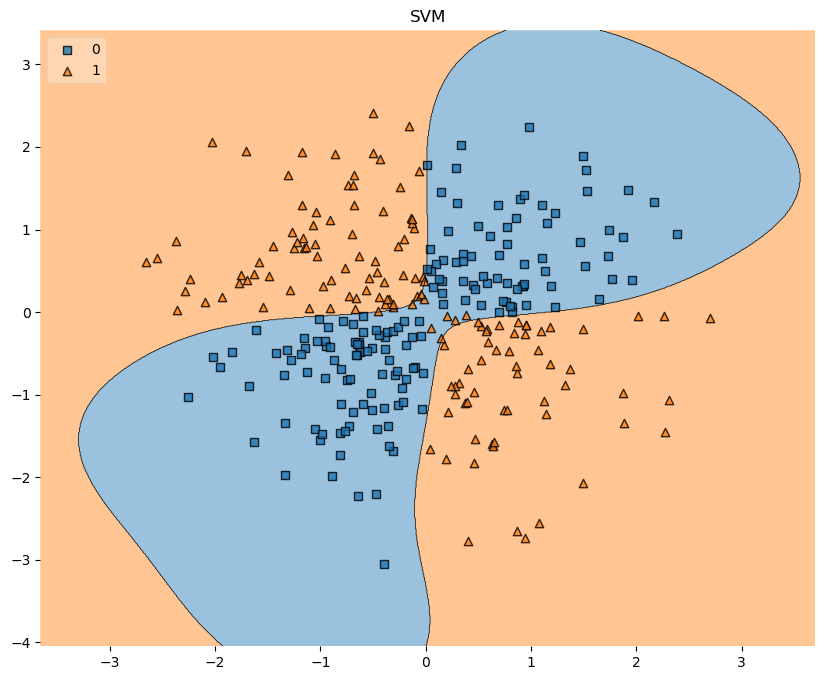

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#Program1:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),
dtype=int)
svm_model = SVC(gamma='auto')
svm_model.fit(X, y)
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=svm_model, legend=2)
plt.title("SVM")
plt.show()

# split Data

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model creation 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # Couche d'entrée 
model.add(Dense(2, activation='relu')) #couche cache 
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie

# Compilation 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Training

In [4]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 0.7065 - accuracy: 0.4208 - val_loss: 0.6881 - val_accuracy: 0.5333
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7023 - accuracy: 0.4208 - val_loss: 0.6879 - val_accuracy: 0.5167
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6984 - accuracy: 0.4250 - val_loss: 0.6874 - val_accuracy: 0.5167
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.4583 - val_loss: 0.6872 - val_accuracy: 0.5167
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.4917 - val_loss: 0.6876 - val_accuracy: 0.4833
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5375 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6885 - accuracy: 0.5958 - val_loss: 0.6884 - val_accuracy: 0.5167
Epoch 8/100
8/8 [=========

# Evaluation

2/2 [==============================] - 0s 5ms/step - loss: 0.5849 - accuracy: 0.6833
Accuracy: 0.6833333373069763


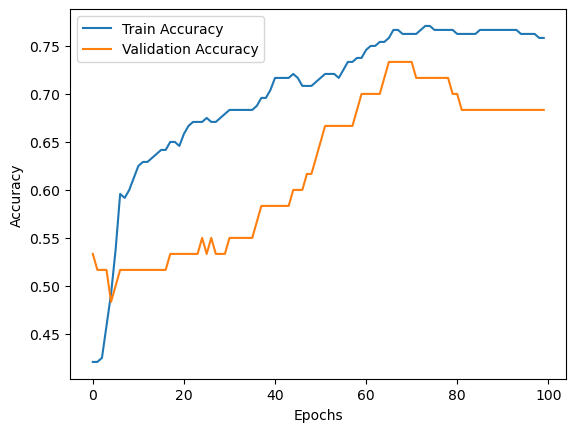

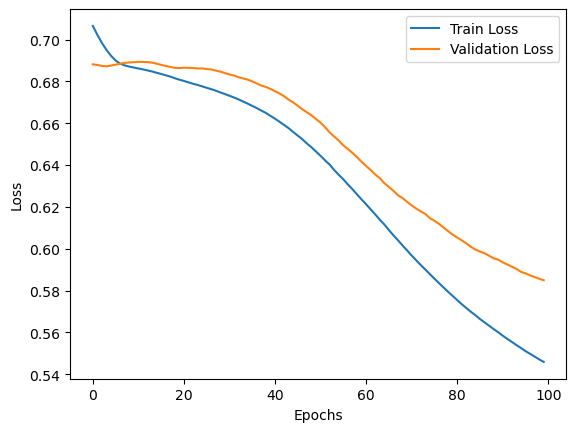

In [5]:
# let's Evaluate our model 
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

#let's Visualise the evolution of training
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2. Oui, le problème de vanishing gradient peut etre la, il parait que les  gradients deviennent très petits lors de la rétropropagation.
Pratiques pour l'éviter :
Choix de fonctions d'activation non saturantes comme ReLU et 
Incorporation de la batch normalization

3. Optimizer Choisi
Adam est souvent une bonne option par défaut pour commencer, mais d'autres optimiseurs comme RMSprop ou SGD pourraient être testés selon le type de données et la complexité du modèle.

4. Learning Rate
Le learning rate peut grandement affecter l'apprentissage. Il peut être choisi en utilisant des techniques comme l'adaptation automatique du taux d'apprentissage (Learning Rate Schedulers) ou en effectuant une recherche par grille pour trouver la meilleure valeur.

5. Nombre d'Epochs
Le nombre d'epochs peut être ajusté en utilisant des techniques d'early stopping ou de validation croisée pour déterminer le moment optimal pour arrêter l'entraînement et éviter le surapprentissage ou le sous-apprentissage.

6. Autres Problèmes
Les déséquilibres de classes peuvent être gérés avec des techniques comme le sur-échantillonnage, le sous-échantillonnage ou l'utilisation de poids de classe pour l'entraînement.


7. Autres Pratiques
L'utilisation de data augmentation pour augmenter la variabilité des données.
L'application de techniques de régularisation comme la dropout ou la pénalisation L1/L2 pour éviter le surapprentissage.

# Updating Model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Maintenant l'initialisation des poids se fait avec la méthode de GlorotUniform, une méthode qui permet une initialisation équilibrée des poids pour aider à l'apprentissage du réseau.Les activations comme ReLU ont été conçues pour aider à atténuer le problème des gradients qui disparaissent. Elles permettent le passage des gradients même pour des valeurs positives. 

In [12]:
from tensorflow.keras.initializers import GlorotUniform

model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu', kernel_initializer=GlorotUniform()))  # Couche d'entrée 
model.add(Dense(2, activation='relu', kernel_initializer=GlorotUniform())) # Couche cachée 
model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform()))  # Couche de sortie



# Choix de l'optimizer 
Dans le premier code, l'optimizer utilisé est simplement 'adam', qui est une implémentation de l'algorithme Adam avec ses hyperparamètres par défaut. Dans le deuxième code, tu utilises Adam également, mais avec une planification d'apprentissage (ExponentialDecay). Cette planification modifie dynamiquement le taux d'apprentissage au fil du temps, le réduisant selon une fonction exponentielle.

# Impact du learning rate
Le taux d'apprentissage (learning rate) est crucial pour déterminer la taille des pas que l'optimizer prend lors de la mise à jour des poids du réseau. Un learning rate trop élevé peut entraîner des oscillations ou des divergences lors de l'apprentissage, tandis qu'un taux trop faible peut ralentir considérablement la convergence ou entraîner une convergence vers un minimum local peu optimal.

# Choix du learning rate
L'initial_learning_rate de 1e-3 avec une décroissance exponentielle de 0.9 toutes les 10 000 étapes semble initialement assez élevé, mais la planification de l'apprentissage permet une diminution progressive, ce qui pourrait stabiliser l'apprentissage et lui permettre de converger vers des régions plus précises du paysage de perte.

In [13]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
lr_schedule = ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Nombre d'epochs 
Le nombre d'epochs représente le nombre de fois où l'ensemble des données est passé à travers le réseau neuronal pendant l'apprentissage. Cela dépend de la complexité du problème, de la taille des données et de la convergence du modèle. Un nombre d'epochs trop faible peut entraîner un sous-apprentissage (underfitting), tandis qu'un nombre trop élevé peut conduire à un surapprentissage (overfitting).

In [14]:
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/150
4/4 [==============================] - 1s 70ms/step - loss: 0.8700 - accuracy: 0.5500 - val_loss: 0.8997 - val_accuracy: 0.4833
Epoch 2/150
4/4 [==============================] - 0s 14ms/step - loss: 0.8643 - accuracy: 0.5417 - val_loss: 0.8941 - val_accuracy: 0.4833
Epoch 3/150
4/4 [==============================] - 0s 14ms/step - loss: 0.8588 - accuracy: 0.5375 - val_loss: 0.8884 - val_accuracy: 0.4667
Epoch 4/150
4/4 [==============================] - 0s 14ms/step - loss: 0.8535 - accuracy: 0.5375 - val_loss: 0.8826 - val_accuracy: 0.4667
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 0.8478 - accuracy: 0.5333 - val_loss: 0.8770 - val_accuracy: 0.4333
Epoch 6/150
4/4 [==============================] - 0s 14ms/step - loss: 0.8431 - accuracy: 0.5292 - val_loss: 0.8709 - val_accuracy: 0.4333
Epoch 7/150
4/4 [==============================] - 0s 13ms/step - loss: 0.8377 - accuracy: 0.5250 - val_loss: 0.8648 - val_accuracy: 0.4500
Epoch 8/150
4/4 [===

2/2 [==============================] - 0s 5ms/step - loss: 0.6623 - accuracy: 0.5500
Accuracy: 0.550000011920929


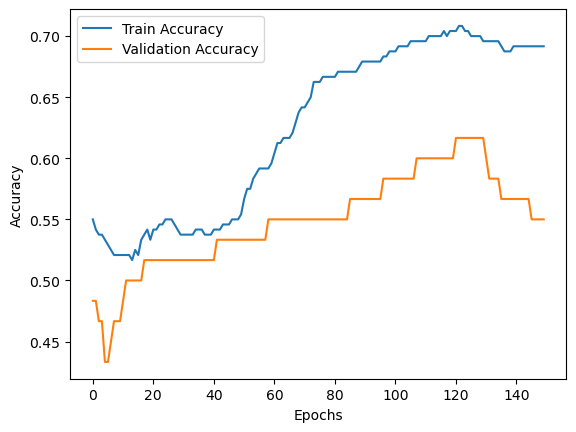

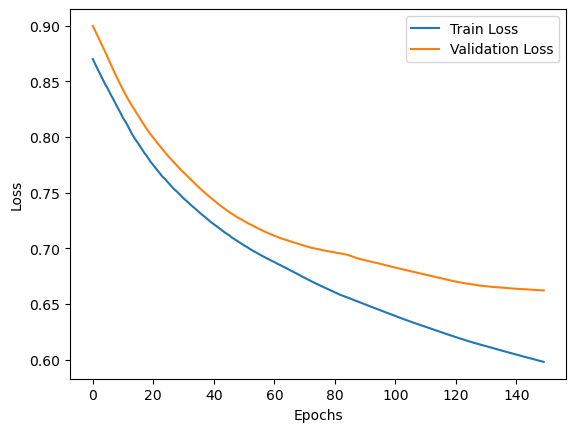

In [15]:
# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Visualisation de l'évolution de l'apprentissage (précision et perte)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Pour améliorer les performances du modèle:
1. Optimisation des hyperparamètres : Expérimente avec différents hyperparamètres d'apprentissage, comme le taux d'apprentissage, la taille du lot (batch size), ou même la structure du modèle pour voir si cela améliore les résultats.
2. Augmentation des données .
3. Entraînement plus long ou avec plus de données


Etape 2 :

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Créer le modèle
model = Sequential([
    Dense(2, input_dim=2, activation='relu',kernel_initializer=GlorotUniform()),
    Dense(4, activation='relu',kernel_initializer=GlorotUniform()),  # Couche cachée avec 4 neurones
    Dense(1, activation='sigmoid',kernel_initializer=GlorotUniform())  # Couche de sortie pour la classification binaire
])

In [155]:
# Initialiser l'optimizer, par exemple RMSprop
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)



In [156]:
# Compiler le modèle
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [157]:

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=110, batch_size=32, validation_split=0.2)

Epoch 1/110
6/6 [==============================] - 1s 46ms/step - loss: 0.6825 - accuracy: 0.4115 - val_loss: 0.6880 - val_accuracy: 0.4583
Epoch 2/110
6/6 [==============================] - 0s 10ms/step - loss: 0.6651 - accuracy: 0.5208 - val_loss: 0.6756 - val_accuracy: 0.5000
Epoch 3/110
6/6 [==============================] - 0s 9ms/step - loss: 0.6519 - accuracy: 0.6354 - val_loss: 0.6662 - val_accuracy: 0.5833
Epoch 4/110
6/6 [==============================] - 0s 9ms/step - loss: 0.6411 - accuracy: 0.6667 - val_loss: 0.6583 - val_accuracy: 0.6042
Epoch 5/110
6/6 [==============================] - 0s 9ms/step - loss: 0.6322 - accuracy: 0.6667 - val_loss: 0.6530 - val_accuracy: 0.6458
Epoch 6/110
6/6 [==============================] - 0s 9ms/step - loss: 0.6252 - accuracy: 0.6719 - val_loss: 0.6481 - val_accuracy: 0.6458
Epoch 7/110
6/6 [==============================] - 0s 9ms/step - loss: 0.6179 - accuracy: 0.6667 - val_loss: 0.6445 - val_accuracy: 0.6458
Epoch 8/110
6/6 [========

2/2 [==============================] - 0s 5ms/step - loss: 0.5277 - accuracy: 0.7000
Accuracy: 0.699999988079071


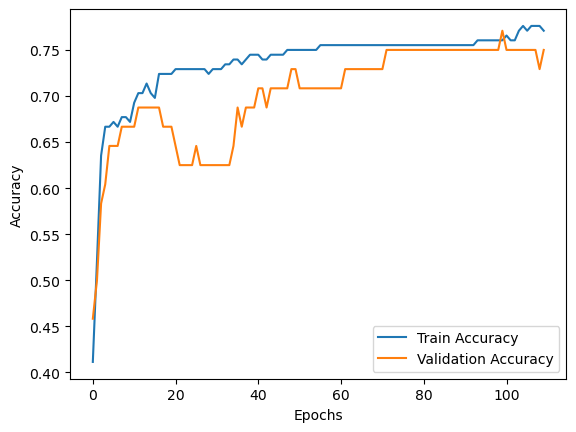

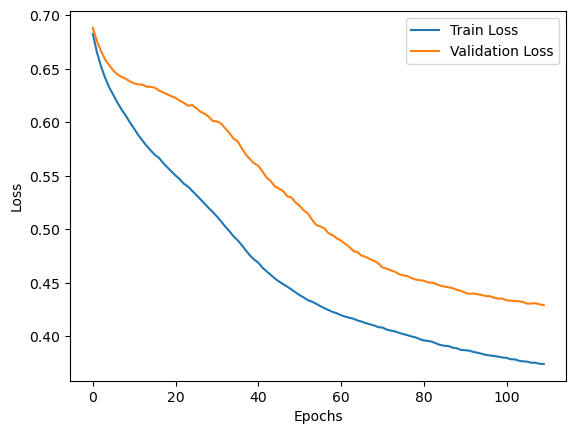

In [158]:
# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Visualisation de l'évolution de l'apprentissage (précision et perte)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy 

In [159]:
# Evaluer le modèle sur les données de test
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy}")

2/2 [==============================] - 0s 5ms/step - loss: 0.5277 - accuracy: 0.7000
Accuracy: 0.699999988079071
